<a href="https://colab.research.google.com/github/korooni123/DeepLearning_Practical/blob/main/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [3]:
keras .__version__

'3.10.0'

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"{x_train.shape}")
print(f"{y_train.shape}")
print(f"{x_test.shape}")
print(f"{y_test.shape}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


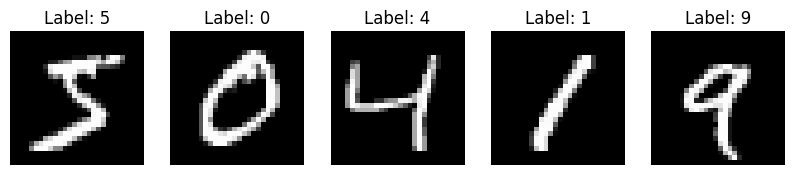

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [7]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

print(f"New shape of x_train: {x_train.shape}")
print(f"New shape of x_test: {x_test.shape}")

New shape of x_train: (60000, 784)
New shape of x_test: (10000, 784)


In [8]:
x_train.dtype

dtype('uint8')

In [10]:
#standard
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

In [12]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9189 - loss: 0.2749 - val_accuracy: 0.9293 - val_loss: 0.2472
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9231 - loss: 0.2668 - val_accuracy: 0.9311 - val_loss: 0.2413
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9257 - loss: 0.2506 - val_accuracy: 0.9322 - val_loss: 0.2358
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9286 - loss: 0.2481 - val_accuracy: 0.9348 - val_loss: 0.2292
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9293 - loss: 0.2451 - val_accuracy: 0.9369 - val_loss: 0.2229


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9298 - loss: 0.2382 - val_accuracy: 0.9373 - val_loss: 0.2160
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9357 - loss: 0.2247 - val_accuracy: 0.9390 - val_loss: 0.2113
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9369 - loss: 0.2187 - val_accuracy: 0.9410 - val_loss: 0.2062
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9389 - loss: 0.2119 - val_accuracy: 0.9438 - val_loss: 0.2004
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9424 - loss: 0.2024 - val_accuracy: 0.9449 - val_loss: 0.1939


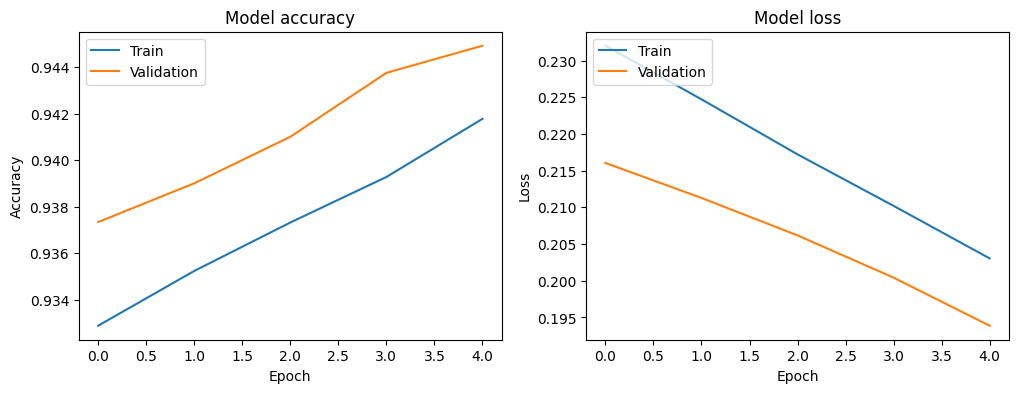

In [15]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
import numpy as np

predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels for the first 5 test images:")
print(predicted_labels)
print("Actual labels for the first 5 test images:")
print(y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted labels for the first 5 test images:
[7 2 1 0 4]
Actual labels for the first 5 test images:
[7 2 1 0 4]


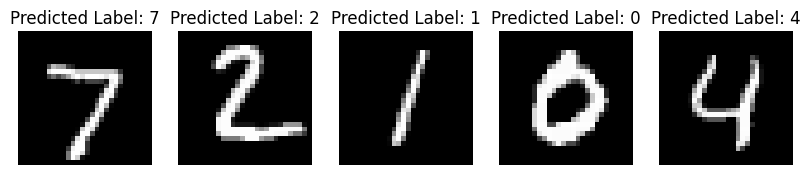

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # We need to reshape the test images back to their original shape for visualization
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.axis('off')
plt.show()